# Input Parameters

In [1]:
#source ISvenv/bin/activate (launching and exiting the virtual environment containing the required modules, stored in the working directory)
#ISvenv/bin/python your_script.py - for running a script in the virtual environment
#source deactivate - to deactivate the virtual environment

#import all the libraries needed
from import_dep import *

# import the class that imports the IS data
from IS_Import import ISdata, ImpedanceData, AgilentIS, SolatronIS
from IS_Functions import IS_plot


# import custom plot style and colorbar functions
from plot_style import set_plot_style


# Define the path to the root directory containing the IS: Data & Output
root_IS_Agilent = '/Users/horatiocox/Desktop/RUG_postdoc/UCL PostDoc/Experiments/Groningen'
root_IS_solatron = '/Users/horatiocox/Desktop/RUG_postdoc/UCL PostDoc/Experiments/Solatron/Calum 1.5'


# Parameters
fig_format = 'png' # format of the figure to be saved
export_data = False # set to True to export the data to figures and a powerpoint presentation and save to path_out


# Custom Scence style settings for figures which returns a figure size to pass to plotting functions if needed
fig_size = set_plot_style(export_data = export_data, use_tex=True)
#plt.style.use(['science', 'grid', 'nature'])




## Extract Impedance Data
- This stores a class object which contains the data in "measurements"
- "measurements" is a dictionary with a key: and a ISdata object containing impedance data
- e.g. print(dev_J.measurements.keys())
- measurements is an iter object so "for measurements in dev_J" loops over the ISdata objects in the dict
- measurements also has a __getitem__ meaning that dev_J[0] indexes the first item in the dict (the first ISdata object)

In [2]:
dev_J = AgilentIS(root_IS_Agilent, 'Dev_K')




run=13, DC=0, T=100.01'
run=13, DC=0, T=110.02'
run=13, DC=0, T=120.07'
run=13, DC=0, T=129.93'
run=13, DC=0, T=139.87'
run=13, DC=0, T=150.03'
run=13, DC=0, T=160.0'
run=13, DC=0, T=169.93'
run=13, DC=0, T=179.92'
run=13, DC=0, T=189.94'
run=13, DC=0, T=19.98'
run=13, DC=0, T=200.03'
run=13, DC=0, T=210.07'
run=13, DC=0, T=219.92'
run=13, DC=0, T=229.92'
run=13, DC=0, T=240.06'
run=13, DC=0, T=250.01'
run=13, DC=0, T=259.96'
run=13, DC=0, T=269.98'
run=13, DC=0, T=279.94'
run=13, DC=0, T=289.94'
run=13, DC=0, T=299.97'
run=13, DC=0, T=30.05'
run=13, DC=0, T=309.94'
run=13, DC=0, T=39.29'
run=13, DC=0, T=49.96'
run=13, DC=0, T=59.98'
run=13, DC=0, T=69.95'
run=13, DC=0, T=80.03'
run=13, DC=0, T=9.98'
run=13, DC=0, T=90.04'
run=1, DC=0, T=10.0'
run=1, DC=0, T=110.01'
run=1, DC=0, T=129.91'
run=1, DC=0, T=150.11'
run=1, DC=0, T=170.04'
run=1, DC=0, T=189.89'
run=1, DC=0, T=210.1'
run=1, DC=0, T=230.08'
run=1, DC=0, T=250.01'
run=1, DC=0, T=269.99'
run=1, DC=0, T=289.94'
run=1, DC=0, T=29

/Users/horatiocox/Desktop/IS_Analysis/ISvenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


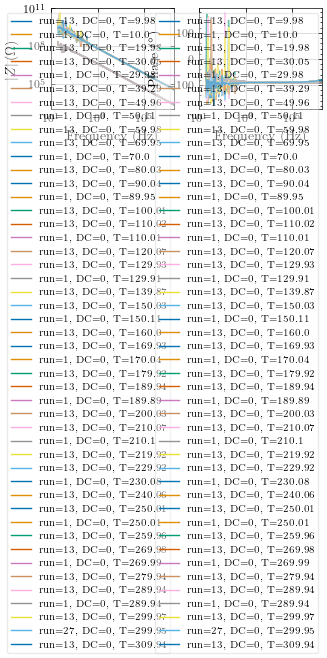

In [3]:
x = [] # empty list
for measurement in dev_J:
    if  measurement.Temperature < 310:
        x.append(measurement)
        
# Disable LaTeX rendering
#plt.rcParams['text.usetex'] = False

fig, ax = IS_plot(x,d_type = 'Zabsphi', x_lim = [1e1,2e6])






# Solatron Pristine

### Import + Sort

In [4]:
Switching = SolatronIS(root_IS_solatron, 'Switching')
V_DC_comp = SolatronIS(root_IS_solatron, 'V_DC comp')
# Pristine_IV = SolatronIS(root_IS_solatron, 'Pristine IV')
# V_RMS_comp = SolatronIS(root_IS_solatron, 'V_RMS comp')


wirebond_5 = [s for s in Switching if s.device_name.lower() == 'wirebond5']

r114 = [s for s in Switching if s.device_name.lower() == 'run114']
r71 = [s for s in V_DC_comp if s.run_number == 71]



# x = [] # empty list
# for measurement in Switching:
#     print(measurement.device_name)

Error: filerun114_WireBond5_doubleformed_ambient_Amp_switching.csv, sweep 12 does not have the expected number of points.
Error loading file run116_WireBond5_doubleformed_ambient_Amp_VDCSweep_Unfinished.csv: Error tokenizing data. C error: Expected 14 fields in line 5776, saw 15

Error loading file run118_WireBond5_doubleformed_vacuum_failed_Amp_VDCSweep.csv: Error tokenizing data. C error: Expected 14 fields in line 5776, saw 15

Error: filerun122_WireBond4v2_pristine_vacuum_Amp_VDCSmallSweep_lowrange.csv, sweep 4 does not have the expected number of points.


### Plot

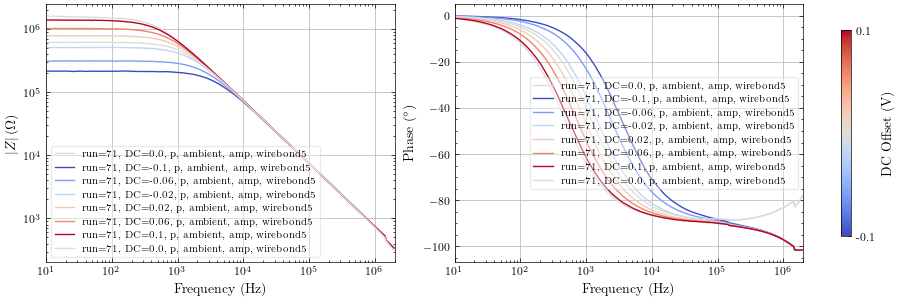

In [5]:
x = [] # empty list
#for measurement in Switching:
    #print(measurement.device_name)
    # if  measurement.vac_state == 'ambient':
    #     x.append(measurement)

        
# Disable LaTeX rendering
#plt.rcParams['text.usetex'] = False

# Plot WITH DC offset colorbar
fig1, ax1 = IS_plot(r71, d_type='Zabsphi', x_lim=[1e1, 2e6],
                    sort_data=False, c_bar=2, fig_size=fig_size)
                    
# Switching.plot((0,1,2,3,4,5,6))


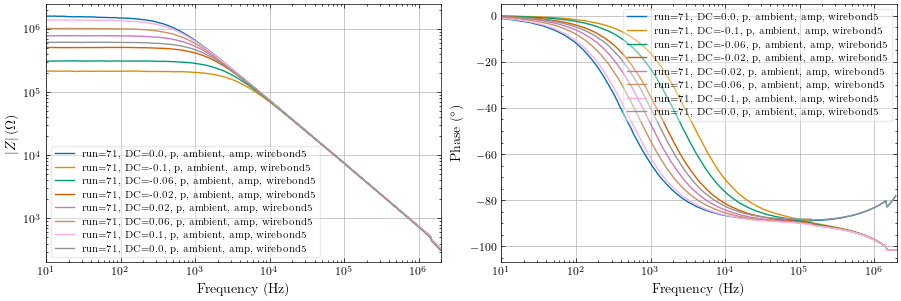

In [6]:
# Plot WITHOUT DC offset colorbar
fig1, ax1 = IS_plot(r71, d_type='Zabsphi', x_lim=[1e1, 2e6],
                    sort_data=False, c_bar=0, fig_size=fig_size)
                    # Note: fig_size is passed from set_plot_style

# Solatron V_DC Comp

### Import + Sort

In [7]:
Switching = SolatronIS(root_IS_solatron, 'Switching')
V_DC_comp = SolatronIS(root_IS_solatron, 'V_DC comp')
Pristine_IV = SolatronIS(root_IS_solatron, 'Pristine IV')
V_RMS_comp = SolatronIS(root_IS_solatron, 'V_RMS comp')


wirebond_5 = [s for s in Switching if s.device_name.lower() == 'wirebond5']

r114 = [s for s in Switching if s.device_name.lower() == 'run114']



Error: filerun114_WireBond5_doubleformed_ambient_Amp_switching.csv, sweep 12 does not have the expected number of points.
Error loading file run116_WireBond5_doubleformed_ambient_Amp_VDCSweep_Unfinished.csv: Error tokenizing data. C error: Expected 14 fields in line 5776, saw 15

Error loading file run118_WireBond5_doubleformed_vacuum_failed_Amp_VDCSweep.csv: Error tokenizing data. C error: Expected 14 fields in line 5776, saw 15

Error: filerun122_WireBond4v2_pristine_vacuum_Amp_VDCSmallSweep_lowrange.csv, sweep 4 does not have the expected number of points.


FileNotFoundError: [Errno 2] No such file or directory: '/Users/horatiocox/Desktop/RUG_postdoc/UCL PostDoc/Experiments/Solatron/Calum 1.5/Pristine IV'

### Plot

In [ ]:


fix, ax = IS_plot(wirebond_5,d_type = 'Zabsphi', x_lim = [1e1,2e6], sort_data = False)

# Switching.plot((0,1,2,3,4,5,6))


In [ ]:
dat = x[0]
eps0 = 8.854e-12  # Vacuum permittivity (F/m)
Cap_0 = eps0*((20e-6)**2)/(30e-9)  # Vacuum capacitance 

# Compute Zreal, Zimag from Zabs, phi
Zap = np.copy(dat.Zabsphi[100:,:]) # Copy the data to avoid modifying the original
Zreal = Zap[:, 1] * np.cos(np.radians(Zap[:, 2]))
Zimag = Zap[:, 1] * np.sin(np.radians(Zap[:, 2]))
# Combine Zreal and Zimag to form complex impedance Z
Z_complex = Zap[:, 1]*np.exp(1j*np.radians(Zap[:, 2])) 
measurement.Zrealimag = np.column_stack((Zap[:, 0], Zreal, Zimag))  # (frequency, Zreal, Zimag)

# Compute permittivity (real and imaginary parts)
omega = 2 * np.pi * Zap[:, 0]
epsilon = 1/(1j*omega*Cap_0 * Z_complex)
epsilon_real = np.real(epsilon)  # Prevent division by zero
epsilon_imag = -np.imag(epsilon)  # Prevent division by zero
measurement.permittivity = np.column_stack((Zap[:, 0], epsilon_real, epsilon_imag))



fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].semilogx(Zap[:, 0],5*(Zap[:, 2]+90) )
ax[0].semilogx(Zap[:, 0], -np.imag(epsilon))

plt.show()